In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "./drive/My Drive/widsdatathon2020"
!ls -l

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/widsdatathon2020
total 102093
-rw------- 1 root root       52 Feb  5 01:58  samplesubmission.csv
-rw------- 1 root root   320363 Feb  5 01:58  solution_template.csv
-rw------- 1 root root 11709733 Feb  5 02:02  training_resumido_modif.csv
-rw------- 1 root root 64747327 Feb  5 01:59  training_v2.csv
-rw------- 1 root root 27733653 Feb  5 01:59  unlabeled.csv
-rw------- 1 root root    29944 Feb  5 01:58 'WiDS Datathon 2020 Dictionary.csv

In [2]:
import pandas as pd

data = pd.read_csv("training_resumido_modif.csv")


data = data.drop(91713)
data = data.drop(91714)
data

,hospital_death,age,elective_surgery,apache_4a_hospital_death_prob,d1_heartrate_max,icu_type,count_na_exams,count_diseases,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_albumin_max,d1_bilirubin_min,d1_bun_max,gcs_motor_apache,d1_hemaglobin_max,ventilated_apache,d1_arterial_pco2_max,d1_arterial_ph_max,d1_sodium_max,temp_apache,glucose_apache,wbc_apache,d1_sysbp_invasive_min,d1_sysbp_noninvasive_max,d1_calcium_min,d1_hco3_max,d1_inr_min,d1_lactate_min,d1_platelets_min,d1_potassium_min
0,0.0,68.0,0.0,0.10,119.0,CTICU,60.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.3,0.40,31.0,6.0,8.9,0.0,45.0,7.39,136.0,39.3,168.0,14.10,64.00,131.0,7.40,19.00,1.43,1.00,233.00,3.40
1,0.0,77.0,0.0,0.47,118.0,Med-Surg ICU,19.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.6,0.50,11.0,3.0,11.3,1.0,37.0,7.45,145.0,35.1,145.0,12.70,96.04,159.0,8.00,27.00,1.30,3.50,487.00,3.80
2,0.0,25.0,0.0,0.00,96.0,Med-Surg ICU,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,148.0,8.21,24.52,1.43,1.74,198.34,3.93
3,0.0,81.0,1.0,0.04,116.0,CTICU,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.6,1.0,37.0,7.44,139.0,34.8,185.0,8.00,78.00,158.0,8.21,24.52,1.10,1.74,43.00,3.50
4,0.0,19.0,0.0,0.09,89.0,Med-Surg ICU,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,147.0,8.21,24.52,1.43,1.74,198.34,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0.0,75.0,0.0,0.12,115.0,Cardiac ICU,41.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.97,27.0,6.0,13.2,1.0,48.0,7.34,140.0,36.6,381.0,11.84,96.04,128.0,8.20,28.00,1.10,1.74,92.00,4.20
91709,0.0,56.0,0.0,0.03,100.0,Med-Surg ICU,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,34.0,6.0,10.5,0.0,85.0,7.26,136.0,37.4,177.0,4.22,81.00,127.0,7.80,30.00,1.43,1.40,133.00,3.80
91710,0.0,48.0,0.0,0.05,158.0,Med-Surg ICU,77.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.1,0.97,33.0,6.0,12.3,0.0,20.0,7.36,139.0,35.8,538.0,17.55,96.04,110.0,6.60,20.00,1.43,1.74,227.00,3.20
91711,0.0,62.0,0.0,0.07,82.0,Med-Surg ICU,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,5.0,11.5,0.0,39.0,7.37,139.0,36.3,158.0,11.84,96.04,153.0,8.21,24.52,1.43,1.74,198.34,3.93


In [0]:
label = data['hospital_death']

x = data.copy()

del x['hospital_death']

In [4]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df

,icu_type
0,CTICU
1,Med-Surg ICU
2,Med-Surg ICU
3,CTICU
4,Med-Surg ICU
...,...
91708,Cardiac ICU
91709,Med-Surg ICU
91710,Med-Surg ICU
91711,Med-Surg ICU


In [5]:
icuTypes = pd.get_dummies(obj_df, columns=["icu_type"])
icuTypes.head()

,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0


In [6]:
x = pd.concat([x,icuTypes], axis=1, sort=False)
del x['icu_type']
x

,age,elective_surgery,apache_4a_hospital_death_prob,d1_heartrate_max,count_na_exams,count_diseases,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_albumin_max,d1_bilirubin_min,d1_bun_max,gcs_motor_apache,d1_hemaglobin_max,ventilated_apache,d1_arterial_pco2_max,d1_arterial_ph_max,d1_sodium_max,temp_apache,glucose_apache,wbc_apache,d1_sysbp_invasive_min,d1_sysbp_noninvasive_max,d1_calcium_min,d1_hco3_max,d1_inr_min,d1_lactate_min,d1_platelets_min,d1_potassium_min,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,0.0,0.10,119.0,60.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.3,0.40,31.0,6.0,8.9,0.0,45.0,7.39,136.0,39.3,168.0,14.10,64.00,131.0,7.40,19.00,1.43,1.00,233.00,3.40,0,0,1,0,0,0,0,0
1,77.0,0.0,0.47,118.0,19.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.6,0.50,11.0,3.0,11.3,1.0,37.0,7.45,145.0,35.1,145.0,12.70,96.04,159.0,8.00,27.00,1.30,3.50,487.00,3.80,0,0,0,0,0,1,0,0
2,25.0,0.0,0.00,96.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,148.0,8.21,24.52,1.43,1.74,198.34,3.93,0,0,0,0,0,1,0,0
3,81.0,1.0,0.04,116.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.6,1.0,37.0,7.44,139.0,34.8,185.0,8.00,78.00,158.0,8.21,24.52,1.10,1.74,43.00,3.50,0,0,1,0,0,0,0,0
4,19.0,0.0,0.09,89.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,6.0,11.5,0.0,45.0,7.39,139.0,36.7,158.0,11.84,96.04,147.0,8.21,24.52,1.43,1.74,198.34,3.93,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,0.0,0.12,115.0,41.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.97,27.0,6.0,13.2,1.0,48.0,7.34,140.0,36.6,381.0,11.84,96.04,128.0,8.20,28.00,1.10,1.74,92.00,4.20,0,0,0,1,0,0,0,0
91709,56.0,0.0,0.03,100.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,34.0,6.0,10.5,0.0,85.0,7.26,136.0,37.4,177.0,4.22,81.00,127.0,7.80,30.00,1.43,1.40,133.00,3.80,0,0,0,0,0,1,0,0
91710,48.0,0.0,0.05,158.0,77.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.1,0.97,33.0,6.0,12.3,0.0,20.0,7.36,139.0,35.8,538.0,17.55,96.04,110.0,6.60,20.00,1.43,1.74,227.00,3.20,0,0,0,0,0,1,0,0
91711,62.0,0.0,0.07,82.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.97,24.5,5.0,11.5,0.0,39.0,7.37,139.0,36.3,158.0,11.84,96.04,153.0,8.21,24.52,1.43,1.74,198.34,3.93,0,0,0,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, label, train_size=0.9, random_state=0)

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_res = sc.fit_transform(x_res)
x_test = sc.transform(x_test)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_res = lda.fit_transform(x_res, y_res)
x_test = lda.transform(x_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_res, y_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

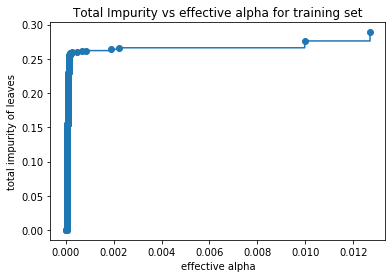

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_res, y_res)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2112104061597827


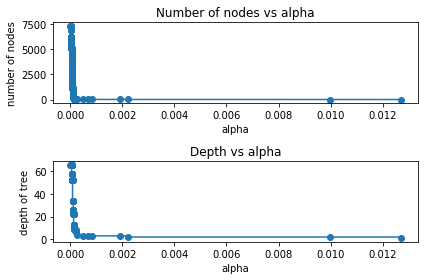

In [22]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [18]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
precision_scores = [ precision_score(y_test,clf.predict(x_test),average="binary") for clf in clfs]
recall_scores = [recall_score(y_test, clf.predict(x_test)) for clf in clfs]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


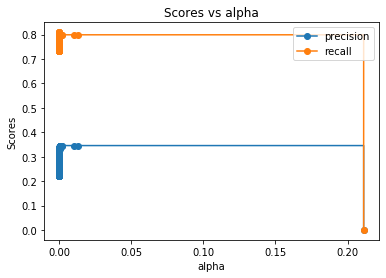

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Scores")
ax.set_title("Scores vs alpha")
ax.plot(ccp_alphas, precision_scores, marker='o', label="precision",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_scores, marker='o', label="recall",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0005, max_depth=None)
clf.fit(x_res, y_res)

y_pred = clf.predict(x_test)

currPrec = precision_score(y_test, y_pred, average='binary')
currRec = recall_score(y_test, y_pred)

print(currPrec)
print(currRec)



0.3455366098294885
0.7993039443155452


0.001
0.4316748423265592
0.7146171693735499
0.002
0.419035029742234
0.7354988399071926
0.004
0.4108626198083067
0.7459396751740139
0.008
0.4057788944723618
0.7494199535962877
0.016
0.40198511166253104
0.7517401392111369
0.032
0.4006172839506173
0.7529002320185615
0.064
0.3991389913899139
0.7529002320185615
0.128
0.3988936693300553
0.7529002320185615
0.256
0.3988936693300553
0.7529002320185615
0.512
0.39815950920245397
0.7529002320185615
1.024
0.39815950920245397
0.7529002320185615
2.048
0.39815950920245397
0.7529002320185615
4.096
0.39815950920245397
0.7529002320185615
8.192
0.39815950920245397
0.7529002320185615


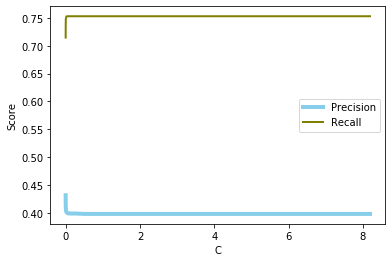

In [35]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

valor = 0.001
lista = []
while valor < 12:
  lista.append(valor)
  valor += valor

for cVal in lista:

  clf= SVC(C=cVal, kernel="linear", shrinking=True)
  clf.fit(x_res, y_res)

  y_pred = clf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(cVal)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

0.001
0.7619047619047619
0.22273781902552203
0.002
0.7572463768115942
0.24245939675174014
0.004
0.7403508771929824
0.24477958236658934
0.008
0.7344827586206897
0.2470997679814385
0.016
0.7346938775510204
0.2505800464037123
0.032
0.7322033898305085
0.2505800464037123
0.064
0.7322033898305085
0.2505800464037123
0.128
0.7322033898305085
0.2505800464037123
0.256
0.7322033898305085
0.2505800464037123
0.512
0.7322033898305085
0.2505800464037123
1.024
0.7322033898305085
0.2505800464037123
2.048
0.7322033898305085
0.2505800464037123
4.096
0.7322033898305085
0.2505800464037123
8.192
0.7322033898305085
0.2505800464037123


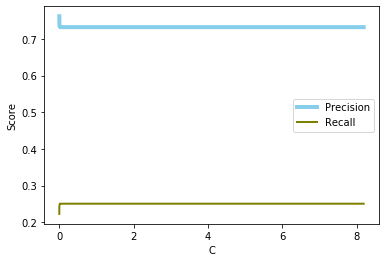

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prec = []
rec = []

valor = 0.001
lista = []
while valor < 12:
  lista.append(valor)
  valor += valor

for cVal in lista:

  clf= SVC(C=cVal, kernel='poly', degree=2)
  clf.fit(x_res, y_res)

  y_pred = clf.predict(x_test)

  currPrec = precision_score(y_test, y_pred, average='binary')
  currRec = recall_score(y_test, y_pred)

  print(cVal)
  print(currPrec)
  print(currRec)

  prec.append(currPrec)
  rec.append(currRec)

# Data
df=pd.DataFrame({'x': lista, 'precision': prec, 'recall': rec })
 
# multiple line plot
plt.plot( 'x', 'precision', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Precision")
plt.plot( 'x', 'recall', data=df, marker='', color='olive', linewidth=2, label="Recall")
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()

![texto alternativo](https://)